# <CENTER>FLIGHT PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("Clean_Dataset.csv.zip")

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### DROPPING THE UNNAMED:0 COLUMNS AS IT IS HAVING NO IMPORTANCE

In [6]:
data.drop(columns='Unnamed: 0' , inplace=True)

In [7]:
data.shape

(300153, 11)

In [8]:
data.isnull().mean()*100

airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

## UNIVARIATE ANALYSIS

## HISTOGRAM

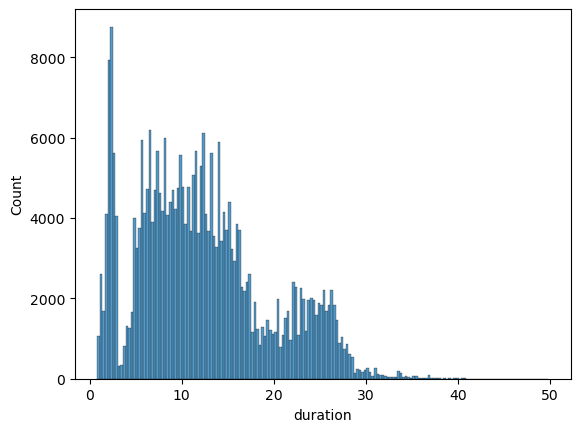

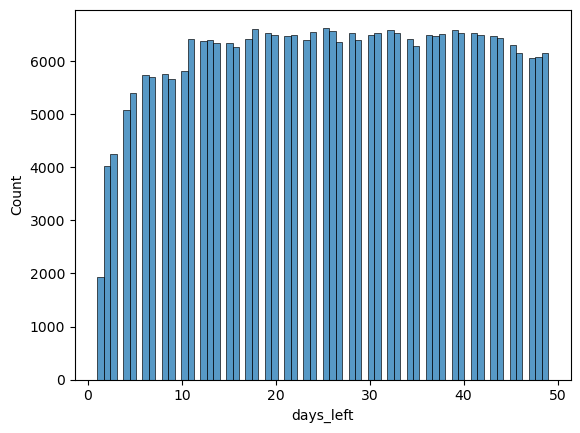

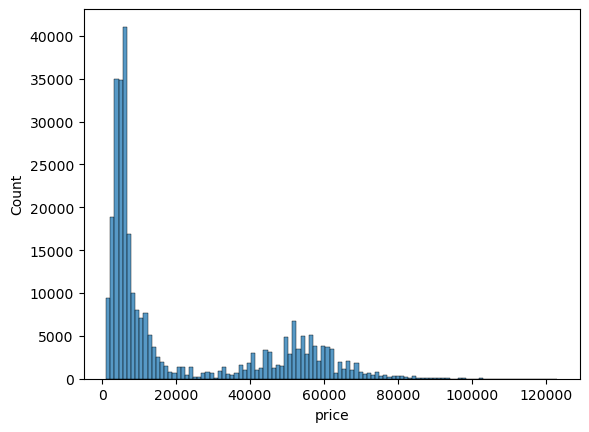

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x =data[i] )
        plt.show()

# KDE PLOT

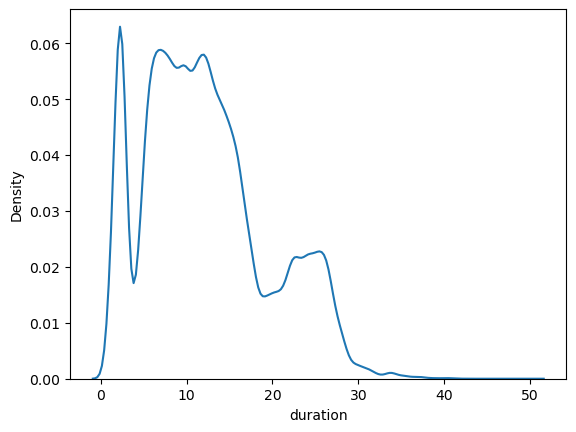

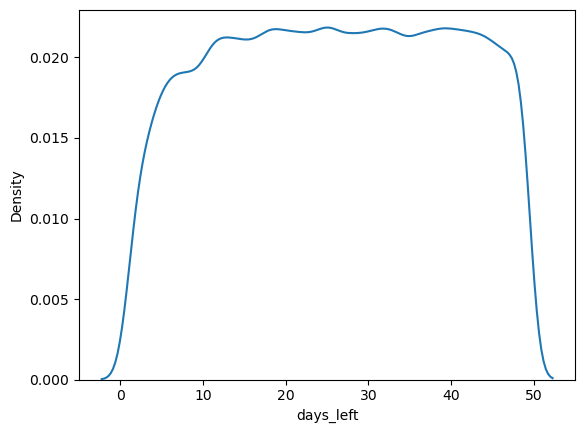

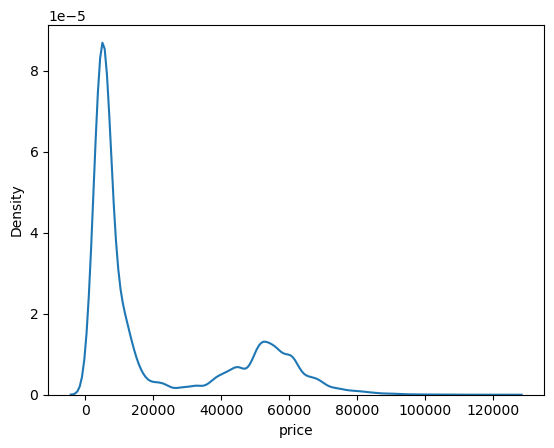

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x =data[i] )
        plt.show()

# BOX PLOT

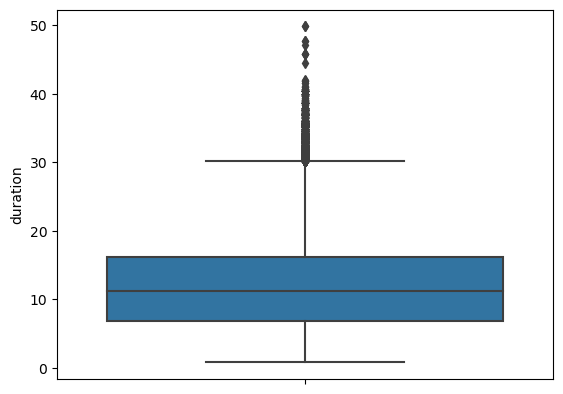

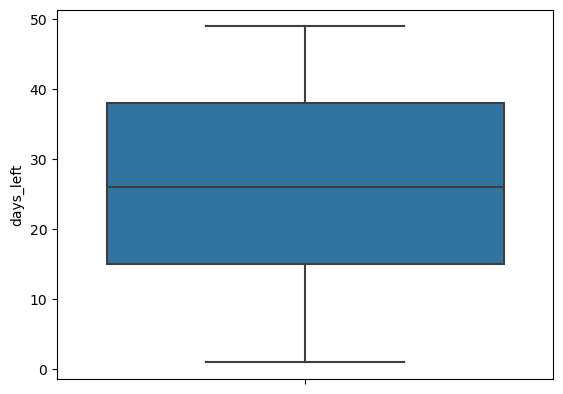

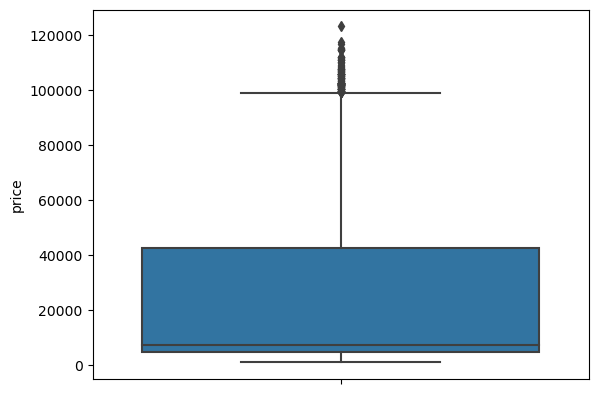

In [12]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y =data[i])
        plt.show();

## SUB PLOT

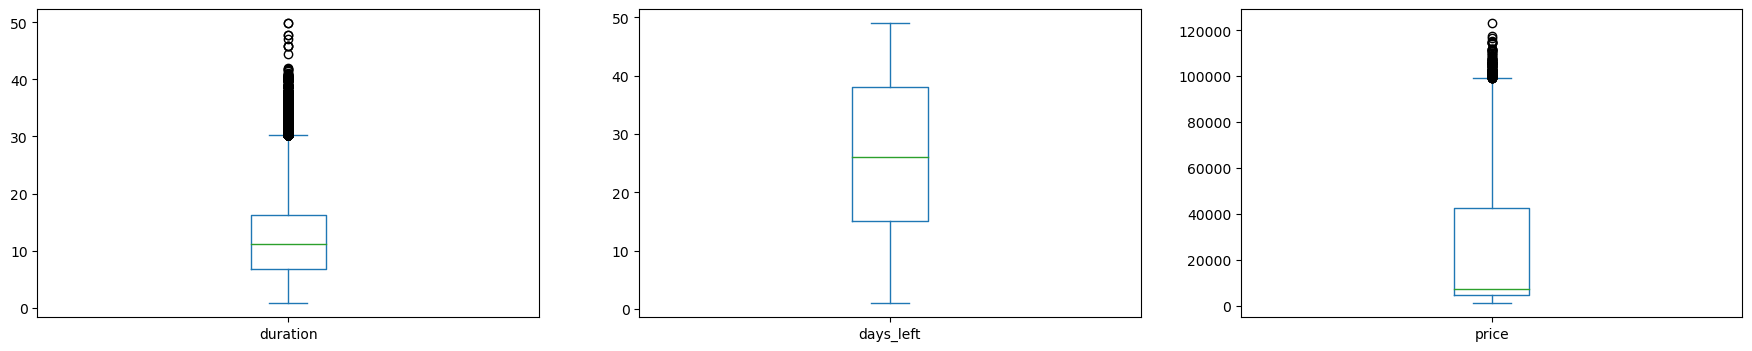

In [13]:
data.plot.box(figsize=(22,4),subplots=True);

## PAIR PLOT

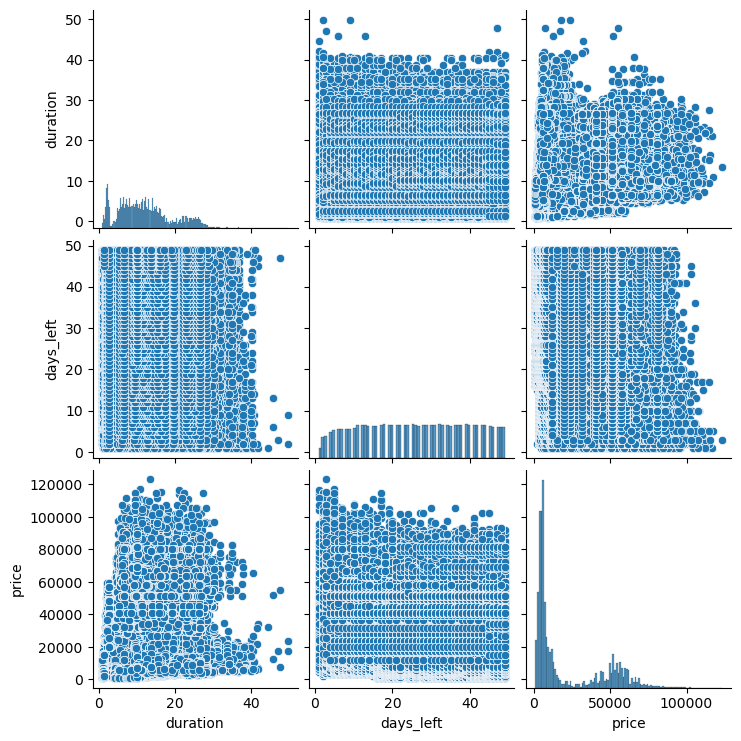

In [14]:
sns.pairplot(data=data)
plt.show()

## MULTI VARIATE ANALYSIS

In [15]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## BAR PLOT

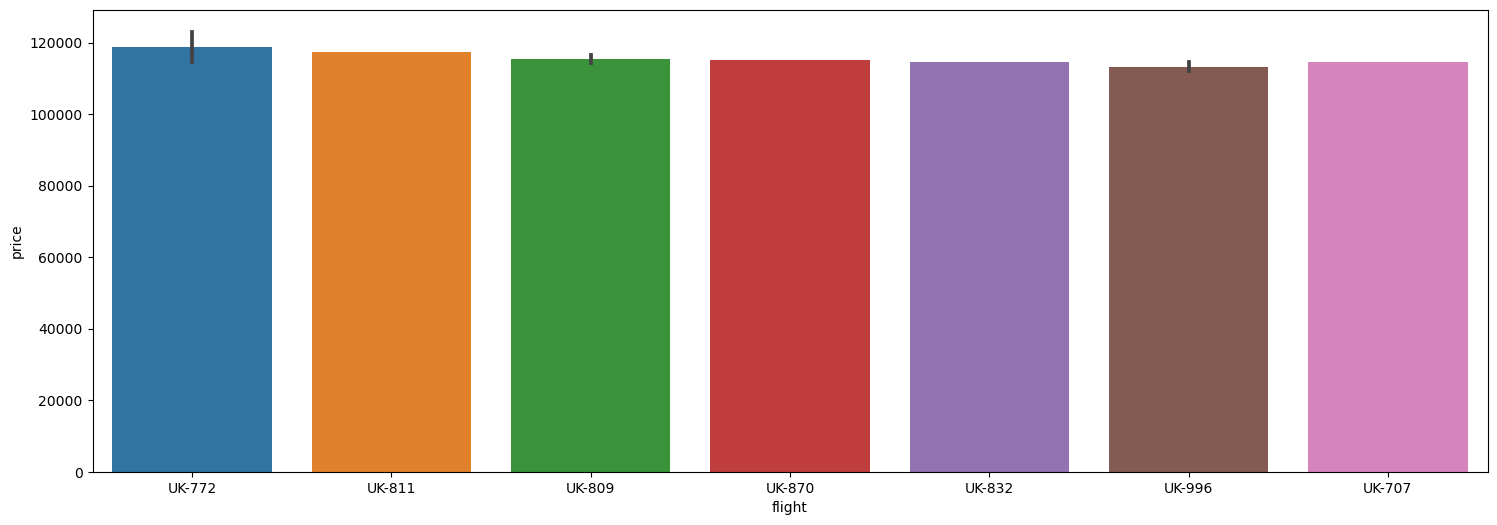

In [16]:
plt.figure(figsize=(18,6))
sns.barplot(x='flight', y='price', data=data.sort_values(by='price',ascending=False)[:10]);

## LINE CHART

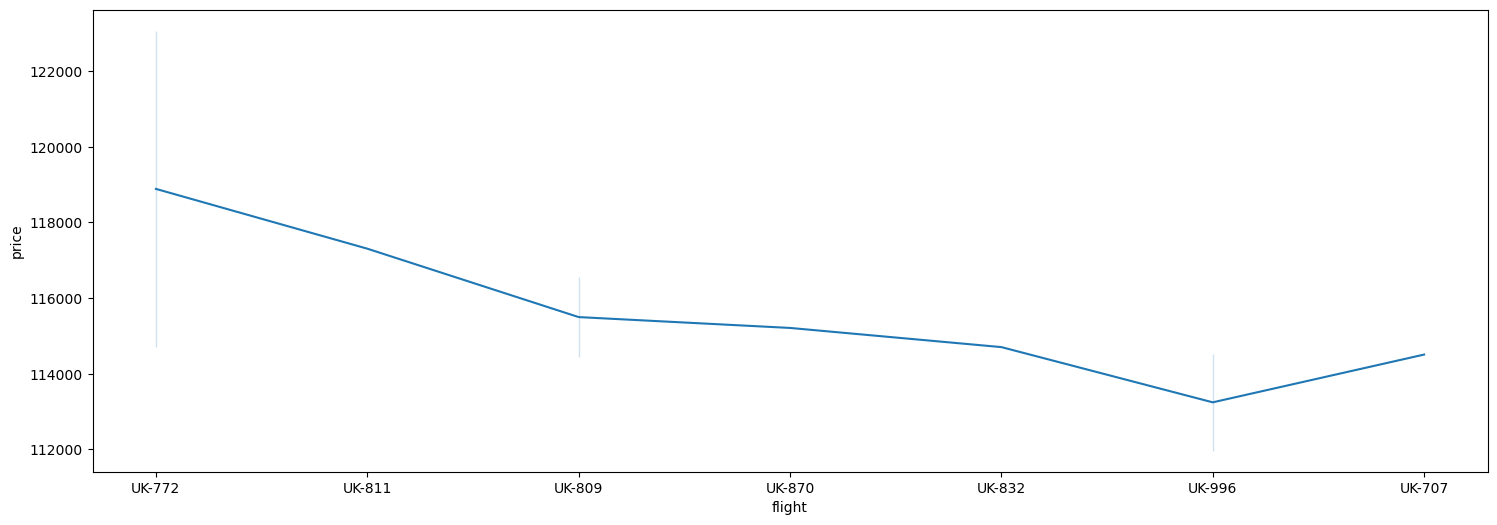

In [17]:
plt.figure(figsize=(18,6))
sns.lineplot(x='flight', y='price', data=data.sort_values(by='price',ascending=False)[:10]);

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## OUTLIER TREATMENT

In [19]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [20]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])


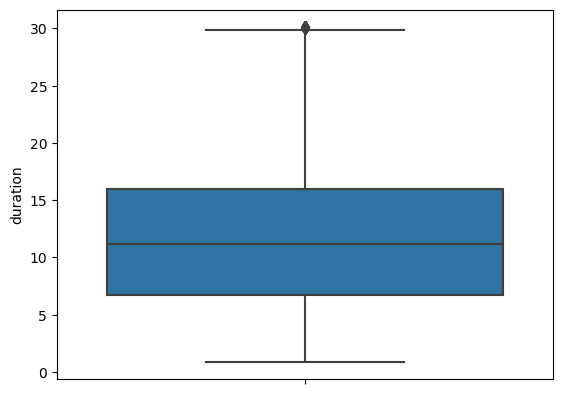

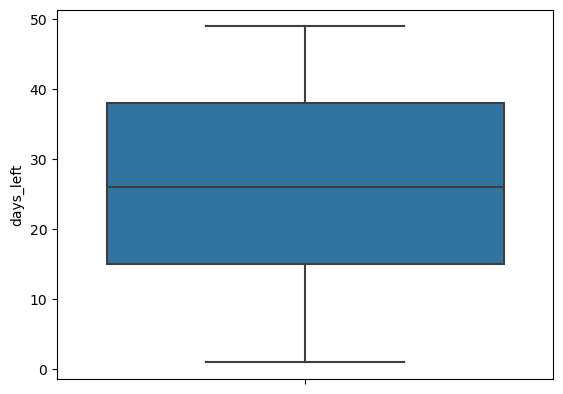

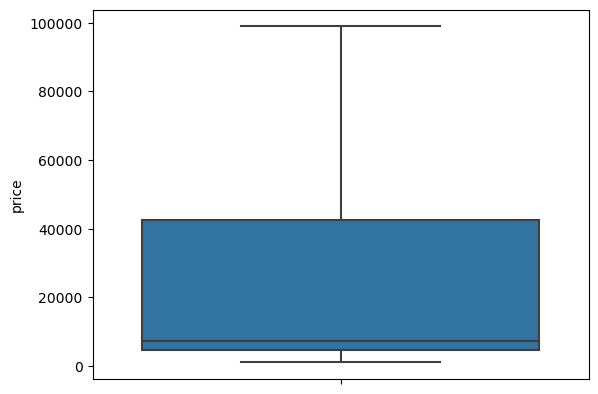

In [21]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show();

## LABEL ENCODING THE CATEGORICAL COLUMN

In [22]:
cols=["departure_time","stops","source_city","arrival_time","destination_city", "class","airline","flight"]
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [23]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1.0,5953.0
1,4,1387,2,1,2,4,5,1,2.33,1.0,5953.0
2,0,1213,2,1,2,1,5,1,2.17,1.0,5956.0
3,5,1559,2,4,2,0,5,1,2.25,1.0,5955.0
4,5,1549,2,4,2,4,5,1,2.33,1.0,5955.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300030 non-null  float64
dtypes: float64(3), int32(8)
memory usage: 16.0 MB


In [25]:
data.dropna(inplace=True)

In [26]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## CHECKING THE CORRELATION WITH THE TARGET

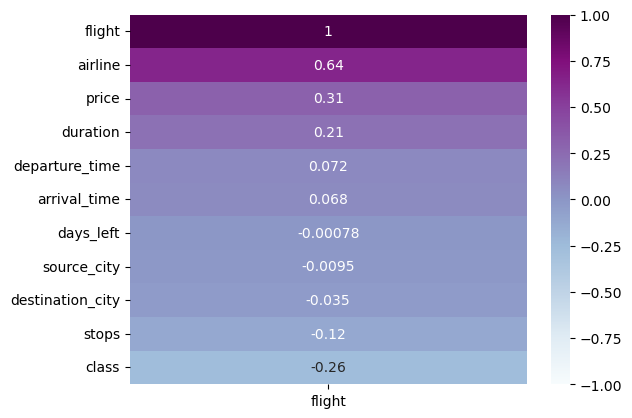

In [56]:
sns.heatmap(data.corr()[['flight']].sort_values(by='flight',ascending=False),vmin=-1,vmax=1,annot=True,cmap="BuPu");

In [61]:
x=data[["airline","price","duration"]].values
y=data[["flight"]].values

## FEATURE SCALING

In [62]:
sc = StandardScaler()

In [63]:
x=sc.fit_transform(x)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## CROSS VALIDATION

In [65]:
models={
       'LinearRegression':LinearRegression(),
       "Ridge":Ridge(),
      "LinearSVR":LinearSVR(),
      "DecisionTreeRegressor":DecisionTreeRegressor(),
      "GradientBoostingRegressor":GradientBoostingRegressor(),
      "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor()
}

In [55]:
for name,model in models.items():
    scores=cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 1.4150482647959977
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 1.4150483665171554
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 1.5809183862986331
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 0.012145789717824812
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 0.012463001037211738
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 0.24974532686730572
*******************************************************

## MODEL BUILDING

In [66]:
model=DecisionTreeRegressor()

In [67]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
y_pred=model.predict(x)

## PREDICTING Y

In [73]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,1408.0,1367.363636
1,1387.0,1330.250000
2,1213.0,1213.000000
3,1559.0,1531.052632
4,1549.0,1539.000000


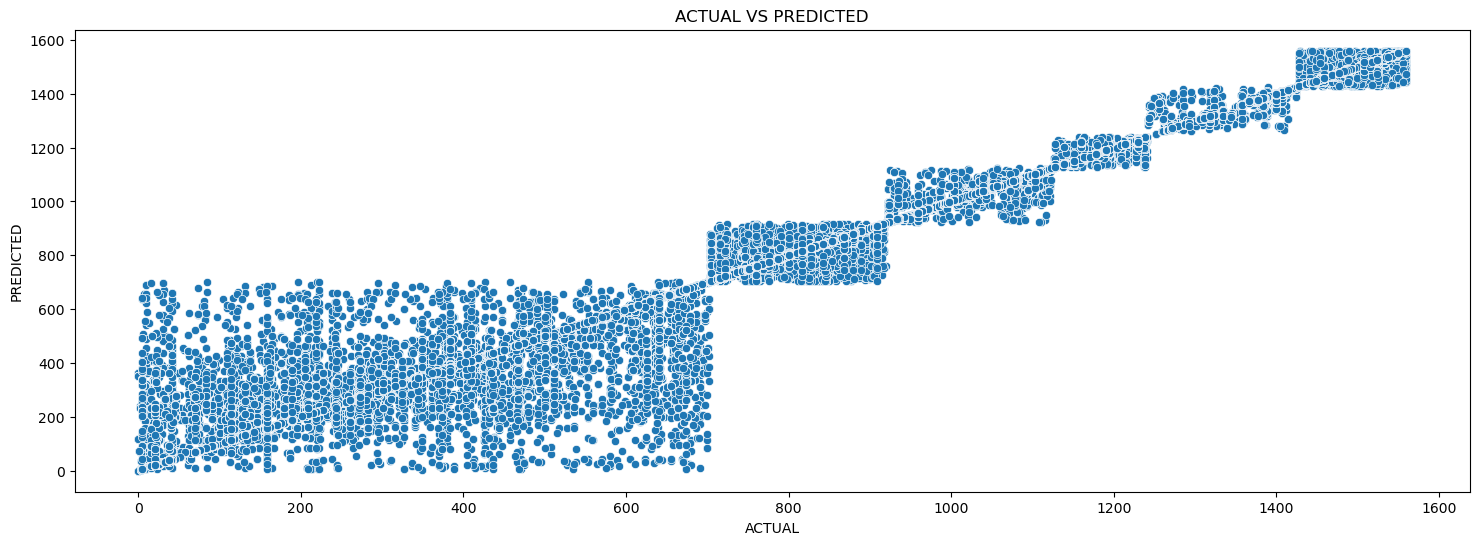

In [74]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");
